## Audio Device Test 

This notebook demonstrates essential Audio I/O utilities provided in the **pyspch.audio** module
- loading audio data from file   
- play audio
- record audio and set device properties
    + in colab recording is supported via the browser (javascript)

Created: 11/04/2021   
Modified: 13/05/2021, 24/05/21, 08/02/22, 21/02/22   
Last Verified: 27/09/2022 (v0.7)

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
%matplotlib inline
from IPython.display import display, clear_output, Audio, HTML
import numpy as np
import matplotlib.pyplot as plt
import librosa

## 1. Verify librosa

librosa uses the python package [soundfile](https://pypi.org/project/SoundFile/) under the hood, which in turn uses the C-library [libsndfile](http://www.mega-nerd.com/libsndfile/).

The next check is a first level verification that these packages are properly installed 

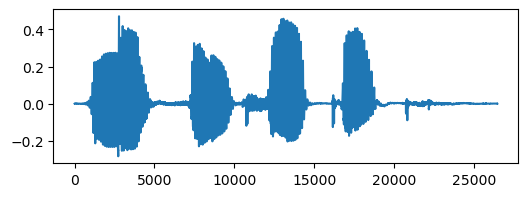

In [3]:
#
wavname = 'misinterpret.wav' # or some other local file
wavdata,sample_rate= librosa.load(wavname) 
# print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
# if you prefer the plot above the audio widget, then flush the plot by adding the line below
# plt.show()
display(Audio(data=wavdata,rate=sample_rate,autoplay=False))

## 2. Reading Audio from file

With **Spch.load()** you can read from *url* or from *file*.  It is a wrapper around librosa.load() allowing for both types of input.   librosa uses the python package [soundfile](https://pypi.org/project/SoundFile/) under the hood, which in turn uses the C-library [libsndfile](http://www.mega-nerd.com/libsndfile/).

In [4]:
# verify the IPython version
import IPython
if IPython.version_info[0] >= 6:
    Audio_args = {'normalize':False}
else:
    print("Warning: you are using IPython<6 \n IPython.display.Audio() will automatically normalize audio output")
    Audio_args = {}
import pyspch.core as Spch
import pyspch.sp as Sps
import pyspch.display as Spd

SAMPLE_WAV_URL = 'https://homes.esat.kuleuven.be/~spchlab/data/misc/train.wav'
SAMPLE_WAV_URL2 = 'https://homes.esat.kuleuven.be/~spchlab/data/misc/bad_bead_booed.wav'
SAMPLE_WAV_13dB_SNGER = 'https://homes.esat.kuleuven.be/~spchlab/data/13dB/Psnger22.wav'
TIMIT_WAV_URL = 'https://homes.esat.kuleuven.be/~spchlab/data/timit/audio/test/dr1/faks0/si2203.wav'

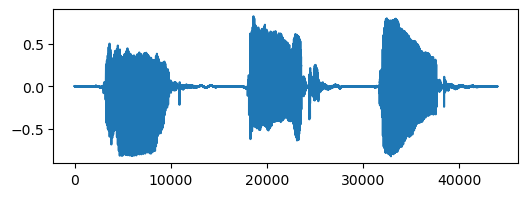

In [5]:
# help(Spch.load)
#
wavname = SAMPLE_WAV_URL2
#wavname = TIMIT_WAV_URL
wavdata,sample_rate= Spch.audio.load(wavname) 
# print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
# if you prefer the plot above the audio widget, then flush the plot by adding the line below
# plt.show()
display(Audio(data=wavdata,rate=sample_rate,autoplay=False,**Audio_args))

## 3. Your (local) Sound Device - querying & setting basic properties

Your sounddevice gets accessed via the [sounddevice](https://pypi.org/project/sounddevice/) package.  Sounddevice mainly provides bindings to the [PortAudio](http://www.portaudio.com/) cross platform C-libarry.

Sounddevice properties are either common for input/output or specified as a list [ input, output ]  
Hardware information and Factory settings are accessible via soundevice.qeury_devices() and souddevice.hostapis().  
Current settings are given in souddevice.default object   
Checking if your input or output devices can handle a request can be done via sounddevice.check_input_settings()

For speech processing you may want to set 
- sounddevice.default.samplerate = 16000    (applied to both input and output)
- sounddevice.default.channels = 1          (you can set different values for input,output )

In [6]:
# Hardware info and factory settings, defaults
import sounddevice as sd
print("Available Devices and Core Audio Libraries on your machince:\n"+"+"*70)
print("Sounddevice: ",sd.__version__)
print("PortAudio: ", sd.get_portaudio_version())
print("Available Devices: "); print(sd.query_devices())
print("Factory Defaults:",sd.query_hostapis())
#
sd.default.samplerate = 16000
sd.default.channels = 1, 1
print("\n\nSettings for Current Devices: input=%d, output=%d " %(sd.default.device[0],sd.default.device[1]))
print("+"*50)
#print("Devices: ", sd.default.device)
print("Factory default settings on input device: ")
print(sd.query_devices(sd.default.device[0]))
print("Factory default settings on output device:")
print(sd.query_devices(sd.default.device[1]))
print("\nDefault Settings (if None ==> factory)")
print("   Number of Channels: ",sd.default.channels)
print("   Sampling Rate: ",sd.default.samplerate)
print("   dtype: ",sd.default.dtype)

Available Devices and Core Audio Libraries on your machince:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Sounddevice:  0.4.5
PortAudio:  (1246976, 'PortAudio V19.7.0-devel, revision 147dd722548358763a8b649b3e4b41dfffbcfbb6')
Available Devices: 
   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone Array (2- Intel® Sma, MME (2 in, 0 out)
   2 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  3 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   4 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   5 Microphone Array (2- Intel® Smart Sound Technology (Intel® SST)), Windows DirectSound (2 in, 0 out)
   6 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
   7 Speakers (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
   8 Speakers (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
   9 Microphone Array (2- Intel® Smart Sound Technology (Intel® SST)), Windows WASAPI (4 in, 0 out)
  10 Microphone Array (Intel® Smart Sound T

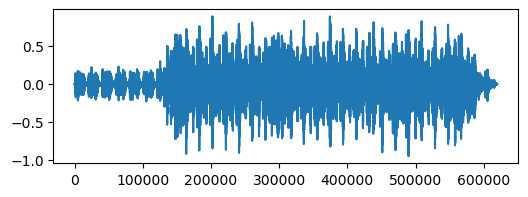

Original Data:  (619982,) 22050


Resampled Data:  (449874,) 16000


In [7]:
# You can specify a new sampling rate when reading in the data or convert multi to mono
# -- sample_rate=16000
# -- mono=True
wavname = SAMPLE_WAV_13dB_SNGER
# wavname = SAMPLE_WAV_URL
wavdata,sample_rate= Spch.audio.load(wavname)
wavdata_16k,sample_rate_16k= Spch.audio.load(wavname,sample_rate=16000)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
plt.show()
print("Original Data: ",wavdata.shape, sample_rate)
display(Audio(data=wavdata,rate=sample_rate,autoplay=False,**Audio_args))
print("Resampled Data: ",wavdata_16k.shape, sample_rate_16k)
display(Audio(data=wavdata_16k,rate=sample_rate_16k,autoplay=False,**Audio_args))

## 4. Record from device

With **Spch.record()** you can record from your local device and in Colab via the webbrowser.
You can set sampling rate and number of channels to be recorded, but check to see if the requested number of
channels is available

In [16]:
# help(Spch.record)
#
requested_channels = 2
try:
    sd.check_input_settings(device=sd.default.device[0],channels=requested_channels)
    print("OK: number of requested channels is available")
except:
    print("Warning: requested number of input channels %d not available; change your request "
          % (requested_channels) )
    requested_channels = 1
sample_rate=16000
wavdata = Spch.audio.record(3.,sample_rate,n_channels=requested_channels)
print(wavdata.shape)

OK: number of requested channels is available
recording started for 3.00 seconds on 2 channel(s)
recording finished
(2, 48000)


In [17]:
# Remark that the IPython Audio object BY DEFAULT NORMALIZES the output
# This is a rather unpleasant default, but it is there for backward compatibility with old IPython versions
# Adding an argument 'normalize=False' overrides this behavior but was not available in older versions (< 7.4 or < 6 ??)
# 
# Also be aware that the IPython Audio module expects values in the range +-1 and otherwise crashes
#
# Record something in a soft voice and play both (un)normalized versions below for clear demonstration
if IPython.version_info[0] >= 6:
    print("Play with Autonormalize OFF")
    display(Audio(data=wavdata,rate=sample_rate,normalize=False))
    print("Play with Autonormalize ON")
    display(Audio(data=wavdata,rate=sample_rate,normalize=True))
else:
    print("Warning: in IPython <6 you can only play normalized audio via the Browser !!")
    display(Audio(data=wavdata,rate=sample_rate))

Play with Autonormalize OFF


Play with Autonormalize ON


## 5. Multichannel plot and play

**Spd.PlotWaveform()** plots mono and multichannel waveforms.

**Spch.play()** plays the audio directly without displaying an interactive HTML control.  
- in Colab an HTML Audio control will be displayed anyhow
- note that the HTML Audio control maximally allows for 2 channels 

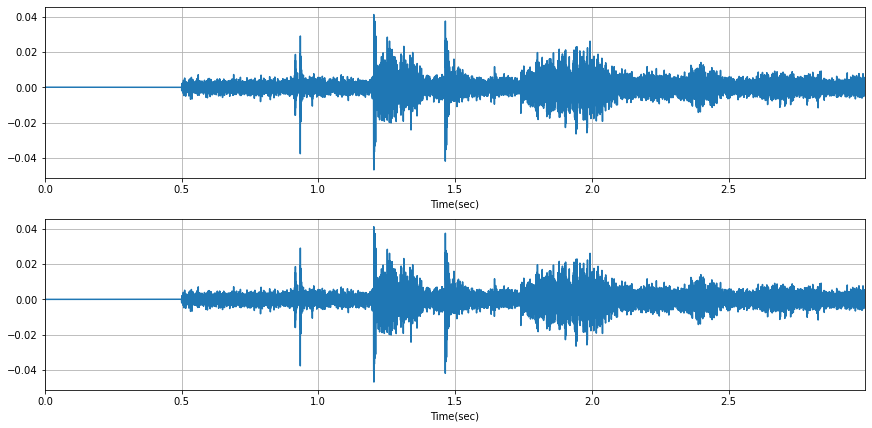

In [12]:
Spd.PlotWaveform(wavdata,sample_rate=sample_rate)

In [13]:
# just play the (stereo) waveform
# if you want to stage multiple sequential plays in a cell (or python code), 
# then you must wait for each of them to finish before starting the next one

# This will play all channels and wait for audio to finish
Spch.audio.play(wavdata,sample_rate=sample_rate,wait=True)

# This plays channel=0 and returns immediately 
Spch.audio.play(wavdata,sample_rate=sample_rate,channels=[0])